In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv(r"Stocks\FB\cleaned_data\FB_2019-01-03_34200000_57600000_orderbook_10.csv")
df["DateTime"] = pd.to_datetime(df["DateTime"], format='%Y-%m-%d %H:%M:%S:%f')
df.set_index(df["DateTime"], inplace=True)
df = df.between_time('09:40', '15:50')
df["Price"] = df["Price"]/10000
df["Spread"] = df["Ask_Price_Level_1"] - df["Bid_Price_Level_1"]
df["Mid"] = (df["Ask_Price_Level_1"] + df["Bid_Price_Level_1"]) /2

df.head()

,DateTime,Event_Type,Order_ID,Size,Price,Direction,Ask_Price_Level_1,Ask_Volume_Level_1,Bid_Price_Level_1,Bid_Volume_Level_1,...,Ask_Price_Level_9,Ask_Volume_Level_9,Bid_Price_Level_9,Bid_Volume_Level_9,Ask_Price_Level_10,Ask_Volume_Level_10,Bid_Price_Level_10,Bid_Volume_Level_10,Spread,Mid
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-01-03 09:40:00.018813,2019-01-03 09:40:00.018813,4,NaN,300,135.516667,1,135.64,101,135.51,200,...,135.78,703,135.38,700,135.79,500,135.37,120,0.13,135.575
2019-01-03 09:40:00.018893,2019-01-03 09:40:00.018893,3,23752730.0,200,135.510000,1,135.64,101,135.50,652,...,135.78,703,135.37,120,135.79,500,135.36,300,0.14,135.570
2019-01-03 09:40:00.018932,2019-01-03 09:40:00.018932,3,23752534.0,100,135.500000,1,135.64,101,135.50,552,...,135.78,703,135.37,120,135.79,500,135.36,300,0.14,135.570
2019-01-03 09:40:00.018936,2019-01-03 09:40:00.018936,1,23777918.0,100,135.630000,-1,135.63,100,135.50,552,...,135.77,100,135.37,120,135.78,703,135.36,300,0.13,135.565
2019-01-03 09:40:00.018971,2019-01-03 09:40:00.018971,1,23777926.0,100,135.630000,-1,135.63,200,135.50,552,...,135.77,100,135.37,120,135.78,703,135.36,300,0.13,135.565


In [23]:
avg_spread = df["Spread"].mean()
tau = df["Ask_Price_Level_1"] - df["Ask_Price_Level_1"].shift(1)
tau = tau[tau != 0].abs().min().round(10)
avg_cost_of_priority = tau/(df["Mid"].mean())
check_spread = avg_spread>3*tau
check_tau_tilde = avg_cost_of_priority < 0.0001

print("\u03C4 = ", tau)
print("\u03C4\u0303 = ", f"{avg_cost_of_priority:.6f}", f"= {100*avg_cost_of_priority:.4f}%", "  | \u03C4\u0303 \u2272 0.01% =",check_tau_tilde)
print("<s(t)> =",avg_spread.round(5),"  | <s(t)> \u2273 3*\u03C4 =",check_spread)
if check_tau_tilde == True and check_spread == True:
    print("\n Properties indicate a small tick stock")
elif check_tau_tilde == False and check_spread == False:
    print("\n Properties indicate a large tick stock")


τ =  0.01
τ̃ =  0.000075 = 0.0075%   | τ̃ ≲ 0.01% = True
<s(t)> = 0.04254   | <s(t)> ≳ 3*τ = True

 Properties indicate a small tick stock


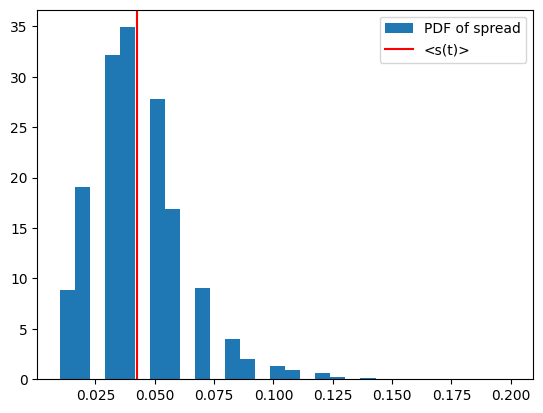

In [37]:
x = df["Spread"]
threshold_small = 3*tau
threshold_large = 1.5*tau
plt.hist(x,density="pdf",bins=30,label="PDF of spread")
plt.axvline(avg_spread,color="red",label="<s(t)>")
plt.axvline(threshold_small,color="Gray",linestyle="--",label="small tick threshold")
plt.axvline(threshold_large,color="Gray",linestyle="--",label="large tick threshold")

plt.legend()

DateTime               2019-01-03 12:20:23.090256
Event_Type                                      3
Order_ID                              236682474.0
Size                                          100
Price                                      132.97
Direction                                       1
Ask_Price_Level_1                          133.02
Ask_Volume_Level_1                            100
Bid_Price_Level_1                          132.98
Bid_Volume_Level_1                            100
Ask_Price_Level_2                          133.03
Ask_Volume_Level_2                            100
Bid_Price_Level_2                          132.97
Bid_Volume_Level_2                            400
Ask_Price_Level_3                          133.06
Ask_Volume_Level_3                            200
Bid_Price_Level_3                          132.96
Bid_Volume_Level_3                            300
Ask_Price_Level_4                          133.07
Ask_Volume_Level_4                            200


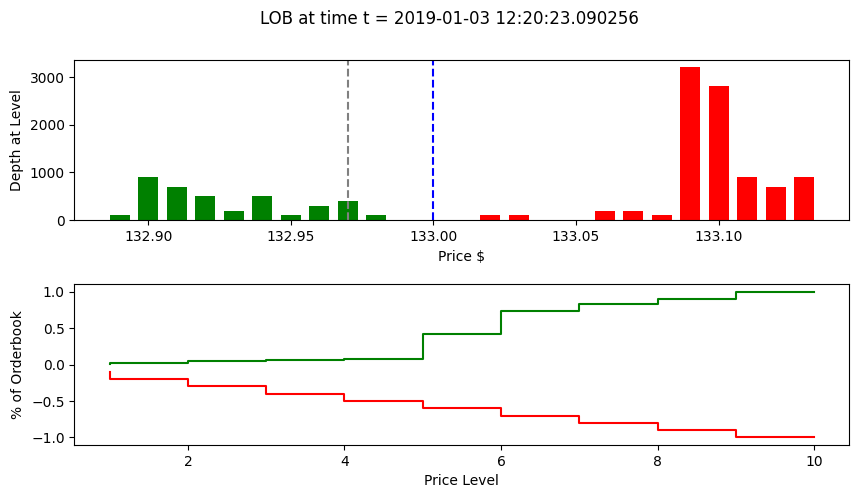

In [24]:
t = np.random.randint(0,len(df))
fig, ax = plt.subplots(2,1,figsize=(10,5))
plt.subplots_adjust(hspace=0.4)
for i in range(10):
    ax[0].bar(df[f"Ask_Price_Level_{i+1}"].iloc[t],df[f"Ask_Volume_Level_{i+1}"].iloc[t],width=0.007,color="red")
    ax[0].bar(df[f"Bid_Price_Level_{i+1}"].iloc[t],df[f"Bid_Volume_Level_{i+1}"].iloc[t],width=0.007,color="green")
ax[0].axvline(df["Mid"].iloc[t], color='blue', linestyle='--')
ax[0].axvline(df["Price"].iloc[t], color='Gray', linestyle='--')

ax[1].step(range(1,11),(df.iloc[t, 7:-2:4]).cumsum()/(df.iloc[t, 7:-2:4]).sum(),color="green")
ax[1].step(range(1,11),-1*(df.iloc[t, 8:-2:4]).cumsum()/(df.iloc[t, 8:-2:4]).sum(),color="red")

ax[0].set_xlabel("Price $")
ax[0].set_ylabel("Depth at Level")
ax[1].set_xlabel("Price Level")
ax[1].set_ylabel(r"% of Orderbook")
fig.suptitle(f"LOB at time t = {df['DateTime'].iloc[t]}")
print(df.iloc[t])

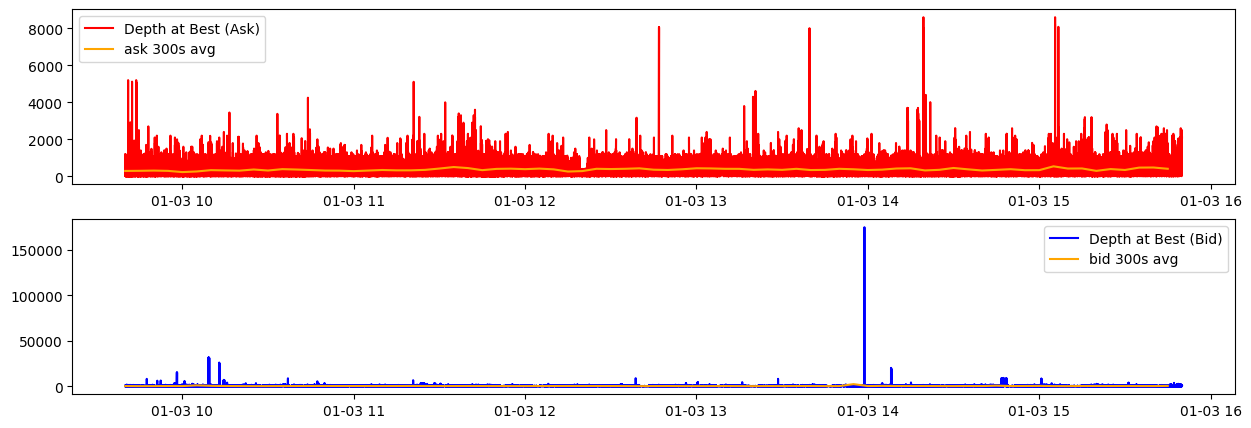

In [25]:
fig,ax = plt.subplots(2,1,figsize=(15,5))
window = 300

df["DoB_ask"] = df["Ask_Volume_Level_1"]
df["DoB_bid"] = df["Bid_Volume_Level_1"]
ax[0].plot(df["DoB_ask"],color="red",label = "Depth at Best (Ask)")
ax[1].plot(df["DoB_bid"],color="blue",label = "Depth at Best (Bid)")

ax[0].plot(df["DoB_ask"].resample(f"{window}s").mean(),color="orange",label=f"ask {window}s avg")
ax[1].plot(df["DoB_bid"].resample(f"{window}s").mean(),color="orange",label=f"bid {window}s avg")


ax[0].legend();ax[1].legend()


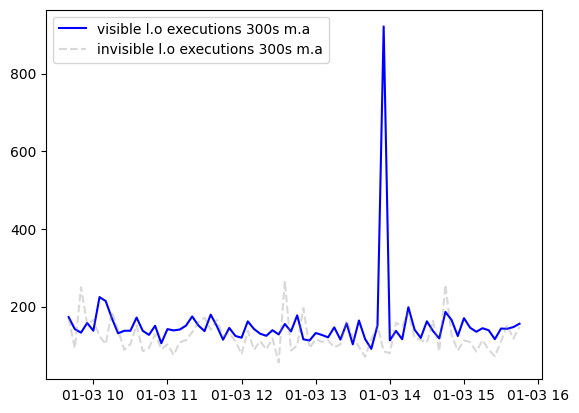

In [26]:
## Visible limit order exectuions

executions_vis = df[(df["Event_Type"]==4)]
executions_invis = df[(df["Event_Type"]==5)]
e_vis_ma = executions_vis["Size"].resample(f"{window}s").mean()
e_invis_ma = executions_invis["Size"].resample(f"{window}s").mean()

plt.plot(e_vis_ma,color="blue",label=f"visible l.o executions {window}s m.a")
plt.plot(e_invis_ma,linestyle="--",color="Gray",alpha=0.3,label=f"invisible l.o executions {window}s m.a")
plt.legend()

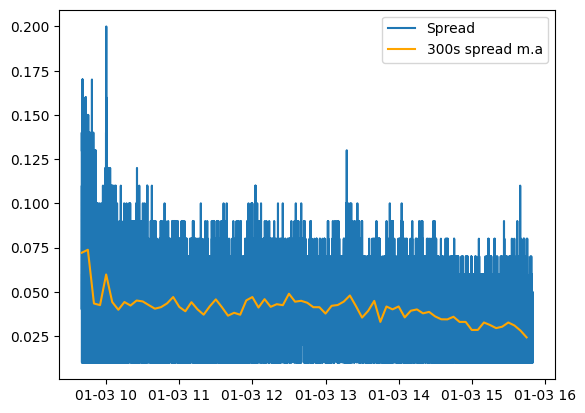

In [27]:
spread_ma = df["Spread"].resample(f"{window}s").mean()

plt.plot(df["Spread"],label="Spread")
plt.plot(spread_ma,color="orange",label=f"{window}s spread m.a")
plt.legend()

(array([3.89280e+04, 0.00000e+00, 8.37370e+04, 0.00000e+00, 0.00000e+00,
        1.41186e+05, 0.00000e+00, 1.53085e+05, 0.00000e+00, 0.00000e+00,
        1.21681e+05, 0.00000e+00, 0.00000e+00, 7.38950e+04, 0.00000e+00,
        3.97890e+04, 0.00000e+00, 0.00000e+00, 1.74250e+04, 0.00000e+00,
        0.00000e+00, 8.77800e+03, 0.00000e+00, 5.87600e+03, 0.00000e+00,
        0.00000e+00, 3.83300e+03, 0.00000e+00, 2.51800e+03, 0.00000e+00,
        0.00000e+00, 1.06200e+03, 0.00000e+00, 0.00000e+00, 4.64000e+02,
        0.00000e+00, 1.43000e+02, 0.00000e+00, 0.00000e+00, 5.50000e+01,
        0.00000e+00, 0.00000e+00, 1.10000e+01, 0.00000e+00, 7.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0.01  , 0.0138, 0.0176, 0.0214, 0.0252, 0.029 , 0.0328, 0.0366,
        0.0404, 0.0442, 0.048 , 0.0518, 0.0556, 0.0594, 0.0632, 0.067 ,
        0.0708, 0.0746, 0.0784, 0.0822, 0.086 , 0.0898, 0.0936, 0.0974,
        0.1012, 0.105 , 0.1088, 0.1126, 0.1164, 0.12

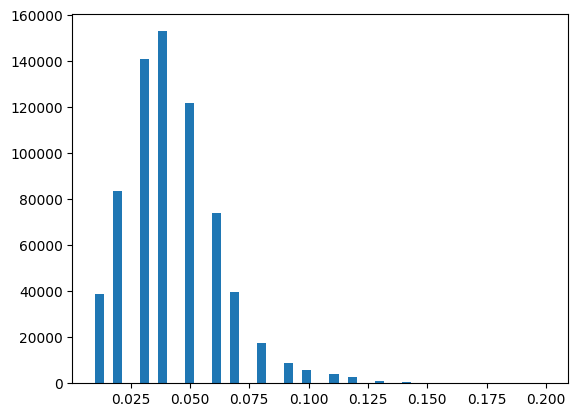

In [28]:
plt.hist(df["Spread"],bins=50)

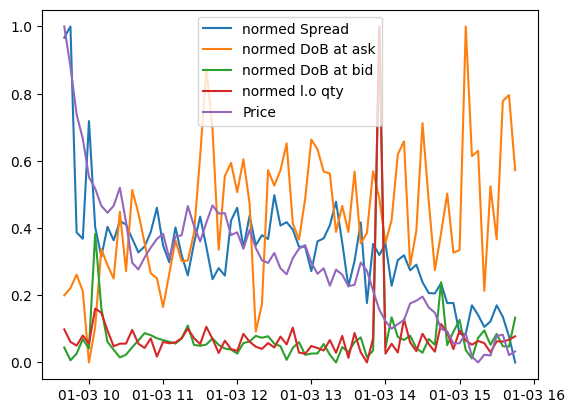

In [29]:
dob_a_ma = df["DoB_ask"].resample(f"{window}s").mean()
dob_b_ma = df["DoB_bid"].resample(f"{window}s").mean()
price_ma = df["Price"].resample(f"{window}s").mean()
z_spread = (spread_ma-spread_ma.min())/(spread_ma.max()-spread_ma.min())
z_dob_a = (dob_a_ma-dob_a_ma.min())/(dob_a_ma.max()-dob_a_ma.min())
z_dob_b = (dob_b_ma-dob_b_ma.min())/(dob_b_ma.max()-dob_b_ma.min())
z_e_vis = (e_vis_ma-e_vis_ma.min())/(e_vis_ma.max()-e_vis_ma.min())
z_price = (price_ma-price_ma.min())/(price_ma.max()-price_ma.min())
plt.plot(z_spread,label="normed Spread")
plt.plot(z_dob_a,label="normed DoB at ask")
plt.plot(z_dob_b,label="normed DoB at bid")
plt.plot(z_e_vis,label="normed l.o qty")
plt.plot(z_price,label="Price")
plt.legend()

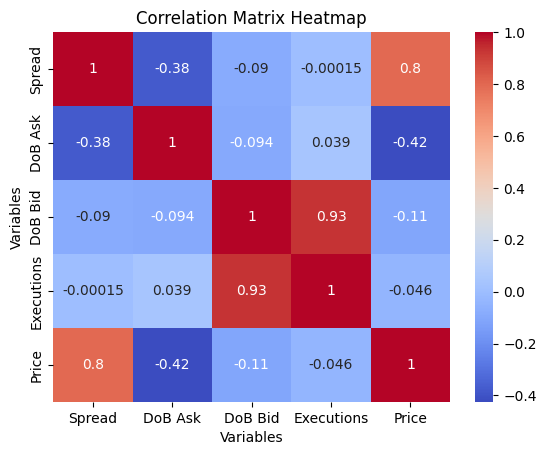

In [30]:
corr_matrix = np.corrcoef((z_spread,z_dob_a,z_dob_b,z_e_vis,price_ma))
ticks = ['Spread', 'DoB Ask', 'DoB Bid', 'Executions','Price']
sns.heatmap(corr_matrix, annot=True,cmap="coolwarm" ,xticklabels=ticks,yticklabels=ticks)
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.title('Correlation Matrix Heatmap')
plt.show()